In [8]:
# Imports
import sys
sys.path.insert(0, '/media/carterrhea/carterrhea/SIGNALS/LUCI/')  # Location of Luci
from LuciBase import Luci
import LUCI.LuciPlotting as lplt
import matplotlib.pyplot as plt

In [3]:
#Set Parameters
# Using Machine Learning Algorithm for Initial Guess
Luci_path = '/media/carterrhea/carterrhea/SIGNALS/LUCI/'
cube_dir = '/media/carterrhea/carterrhea/M33'  # Path to data cube
cube_name = 'M33_Field7_SN3.merged.cm1.1.0'  # don't add .hdf5 extension
object_name = 'M33_Field7'
redshift = -0.0006  # Redshift of M33
resolution = 5000

In [4]:
# Create Luci object
cube = Luci(Luci_path, cube_dir+'/'+cube_name, cube_dir, object_name, redshift, resolution)

  0%|          | 0/9 [00:00<?, ?it/s]

Reading in data...


100%|██████████| 9/9 [01:56<00:00, 12.93s/it]


In [5]:
bkg_axis, bkg_sky = cube.extract_spectrum_region(cube_dir+'/bkg.reg', mean=True)  # We use mean=True to take the mean of the emission in the region instead of the sum

100%|██████████| 2064/2064 [00:04<00:00, 435.37it/s]


100%|██████████| 2064/2064 [00:04<00:00, 414.96it/s]


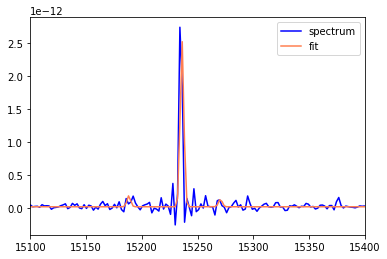

In [9]:
# Fit!
axis, sky, fit_dict = cube.fit_spectrum_region(['NII6548', 'Halpha', 'NII6583', 'SII6716', 'SII6731'],
                                    'sincgauss', [1,1,1,1,1], [1,1,1,1,1],
                                    region='../Data/reg1.reg', bkg=bkg_sky)
plt.plot(axis, sky, color='blue', label='spectrum')
plt.plot(fit_dict['fit_axis'], fit_dict['fit_vector'], color='coral', label='fit')
plt.xlim((15100, 15400))
plt.legend()